# PREDICTING PRICE OF AIR BNB'S IN THE STATE OF CALIFORNIA

### 1. Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Read the CSV file into a DataFrame

In [5]:
df = pd.read_csv('AIR_BNB_2020.CSV')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

### 2. Data Cleaning

### Removing column neighbourhood_group,neighbourhood because the data is not usefel and has many irregularities


In [8]:
df.drop(columns=['neighbourhood'], inplace=True)

In [9]:
df.drop(columns=['neighbourhood_group'], inplace=True)

In [10]:
# Assuming 'df' is your DataFrame
df = df[~df['city'].isin(['Asheville', 'New York City','Hawaii','Broward County','Austin','Clark County','Washington D.C.','Seattle','Twin Cities MSA','New Orleans','Chicago','Nashville','Portland','Denver','Rhode Island','Boston','Jersey City','Columbus','Cambridge','Salem','Pacific Grove'])]

In [11]:
df

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
73072,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,33.98209,-118.38494,Entire home/apt,115,30,2,15/05/16,0.02,1,163,Los Angeles
73073,344,Family perfect;Pool;Near Studios!,767,Melissa,34.16562,-118.33458,Entire home/apt,176,2,8,19/10/19,0.15,1,0,Los Angeles
73074,2708,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,3008,Chas.,34.09768,-118.34602,Private room,74,30,26,31/07/20,0.34,2,338,Los Angeles
73075,2732,Zen Life at the Beach,3041,Yoga Priestess,34.00475,-118.48127,Private room,155,1,21,27/12/19,0.19,2,360,Los Angeles
73076,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,33.87619,-118.11397,Entire home/apt,50,30,0,NaN,NaN,1,0,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205630,43816500,"Anchors Away Beach House! Steps from Beach, Vi...",65605702,Holly,36.96294,-121.89808,Entire home/apt,350,3,0,NaN,NaN,1,178,Santa Cruz County
205631,43818358,Aptos Cottage ‚ÄúSeas The Day‚Äù 2 blocks to b...,216279197,Liane,36.96934,-121.90397,Entire home/apt,131,30,0,NaN,NaN,1,125,Santa Cruz County
205632,43858737,"Heron House- Fantastic, Private Beach House!",350822095,Jody,36.95658,-121.97818,Entire home/apt,550,2,0,NaN,NaN,1,0,Santa Cruz County
205633,43947080,Capitola Village Wind + Sea Apartment,213027719,Dan And Dan,36.98212,-121.95143,Entire home/apt,275,2,0,NaN,NaN,5,155,Santa Cruz County


### Collecting information for removing NULL values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65714 entries, 73072 to 205634
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65714 non-null  int64  
 1   name                            65711 non-null  object 
 2   host_id                         65714 non-null  int64  
 3   host_name                       65704 non-null  object 
 4   latitude                        65714 non-null  float64
 5   longitude                       65714 non-null  float64
 6   room_type                       65714 non-null  object 
 7   price                           65714 non-null  int64  
 8   minimum_nights                  65714 non-null  int64  
 9   number_of_reviews               65714 non-null  int64  
 10  last_review                     52468 non-null  object 
 11  reviews_per_month               52468 non-null  float64
 12  calculated_host_listings_co

### Removing all the rows having NULL values

In [13]:
df.dropna(inplace=True)

In [14]:
df

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
73072,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,33.98209,-118.38494,Entire home/apt,115,30,2,15/05/16,0.02,1,163,Los Angeles
73073,344,Family perfect;Pool;Near Studios!,767,Melissa,34.16562,-118.33458,Entire home/apt,176,2,8,19/10/19,0.15,1,0,Los Angeles
73074,2708,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,3008,Chas.,34.09768,-118.34602,Private room,74,30,26,31/07/20,0.34,2,338,Los Angeles
73075,2732,Zen Life at the Beach,3041,Yoga Priestess,34.00475,-118.48127,Private room,155,1,21,27/12/19,0.19,2,360,Los Angeles
73077,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,33.98750,-118.43200,Private room,55,30,310,29/04/20,2.28,4,282,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205622,43451416,The Honeycomb Suite at Sand Rock Farm,337811449,Jen,36.97975,-121.86266,Private room,130,2,2,07/06/20,1.62,4,9,Santa Cruz County
205623,43468228,"Sand Rock Farm, Your Private 10-acre Retreat!",337811449,Jen,36.97988,-121.86389,Entire home/apt,1200,2,1,16/06/20,1.00,4,261,Santa Cruz County
205624,43527591,BeachCottage-HotTub E-Bikes Surfbrd &AquariumPass,2140089,Anja & Evan,36.95958,-121.97755,Entire home/apt,350,1,2,05/06/20,2.00,4,0,Santa Cruz County
205626,43624357,Sunny room in manufactured home 1.2 miles to b...,348320632,Faith,36.97390,-121.97538,Private room,43,1,3,26/06/20,3.00,1,19,Santa Cruz County


### Shape of dataframe 

In [15]:
df.shape

(52462, 15)

## Descriptive Analysis of the Data

In [16]:
all_columns = df.columns 

In [17]:
print("all the columns in the dataframe are")
for i in all_columns:
    print(i)

all the columns in the dataframe are
id
name
host_id
host_name
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
city


### Getting the variable types for data Exploration

1. Catagorical Data - Ordinal Data, Nominal Data
2. Numeric Data - Continuous Data, Discrete Data


### Getting columns having Categorical Data for Data Cleaning


In [18]:
print("THIS IS CATAGORICAL DATA COLUMNS")
print("--------------------------------")
print("1. Room Types")
df.room_type.value_counts()

THIS IS CATAGORICAL DATA COLUMNS
--------------------------------
1. Room Types


Entire home/apt    33933
Private room       16935
Shared room         1348
Hotel room           246
Name: room_type, dtype: int64

In [19]:
print("--------------------------------")
print("2. City")
df.city.value_counts()


--------------------------------
2. City


Los Angeles          24393
San Diego            10318
San Clara Country     5794
San Francisco         5469
Oakland               2608
San Mateo County      2443
Santa Cruz County     1437
Name: city, dtype: int64

### REMOVING THE UNNECESARY COLUMNS 
NAME ID HOST_NAME AND LAST_REVIEW

In [20]:
df.drop(['name','host_name','last_review','id'], axis=1,inplace=True)

In [21]:
df

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
73072,521,33.98209,-118.38494,Entire home/apt,115,30,2,0.02,1,163,Los Angeles
73073,767,34.16562,-118.33458,Entire home/apt,176,2,8,0.15,1,0,Los Angeles
73074,3008,34.09768,-118.34602,Private room,74,30,26,0.34,2,338,Los Angeles
73075,3041,34.00475,-118.48127,Private room,155,1,21,0.19,2,360,Los Angeles
73077,9171,33.98750,-118.43200,Private room,55,30,310,2.28,4,282,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...
205622,337811449,36.97975,-121.86266,Private room,130,2,2,1.62,4,9,Santa Cruz County
205623,337811449,36.97988,-121.86389,Entire home/apt,1200,2,1,1.00,4,261,Santa Cruz County
205624,2140089,36.95958,-121.97755,Entire home/apt,350,1,2,2.00,4,0,Santa Cruz County
205626,348320632,36.97390,-121.97538,Private room,43,1,3,3.00,1,19,Santa Cruz County


### To check if there is any null value in any column

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52462 entries, 73072 to 205629
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         52462 non-null  int64  
 1   latitude                        52462 non-null  float64
 2   longitude                       52462 non-null  float64
 3   room_type                       52462 non-null  object 
 4   price                           52462 non-null  int64  
 5   minimum_nights                  52462 non-null  int64  
 6   number_of_reviews               52462 non-null  int64  
 7   reviews_per_month               52462 non-null  float64
 8   calculated_host_listings_count  52462 non-null  int64  
 9   availability_365                52462 non-null  int64  
 10  city                            52462 non-null  object 
dtypes: float64(3), int64(6), object(2)
memory usage: 4.8+ MB


### To check if any property has price equal to 0 

In [23]:
zero_price_count= df[df['price']==0].count()['price']
print(zero_price_count)

10


In [24]:
df = df[~df['price'].isin([0])]   #deleted those rows

### 4. Data Visualisation

<Axes: >

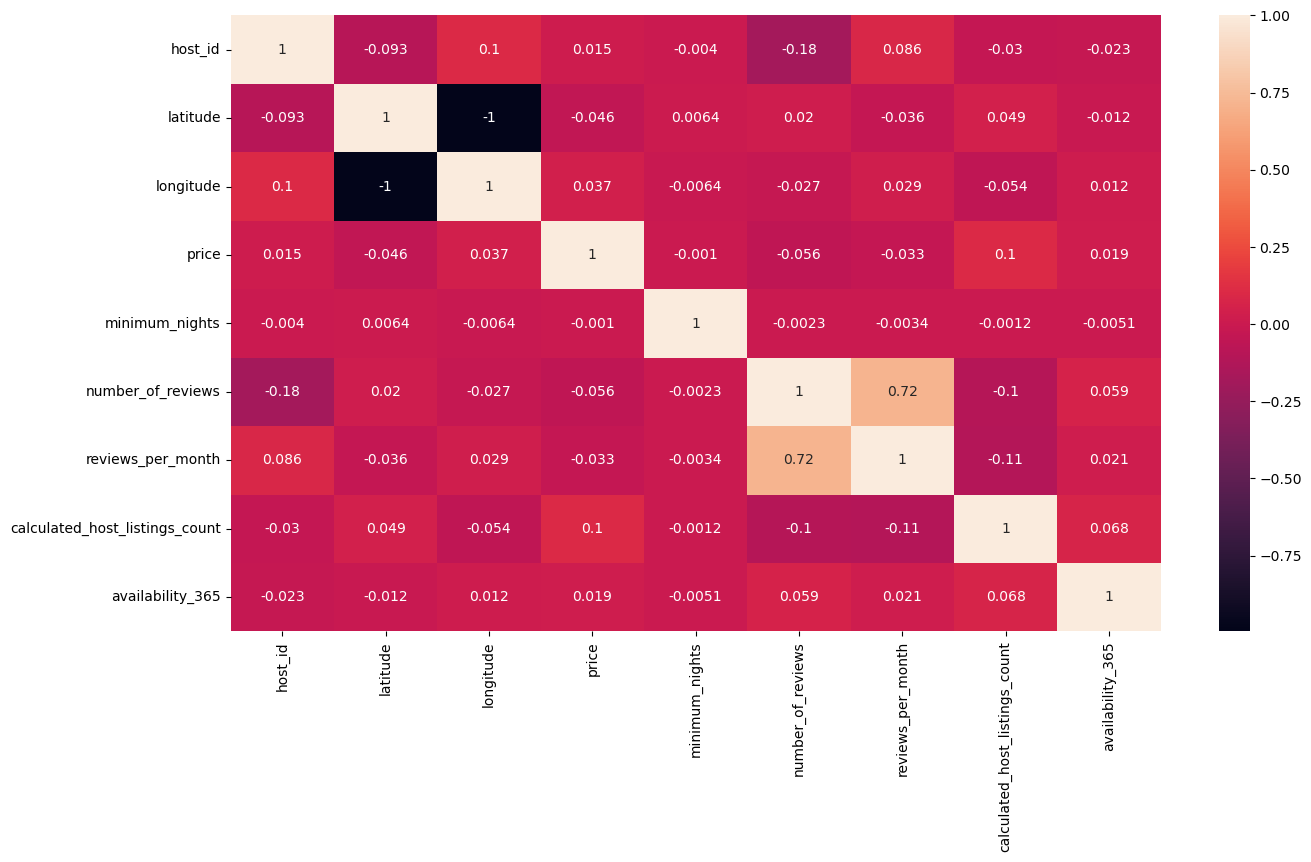

In [25]:
corr= df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

### Roomtype vs the price 


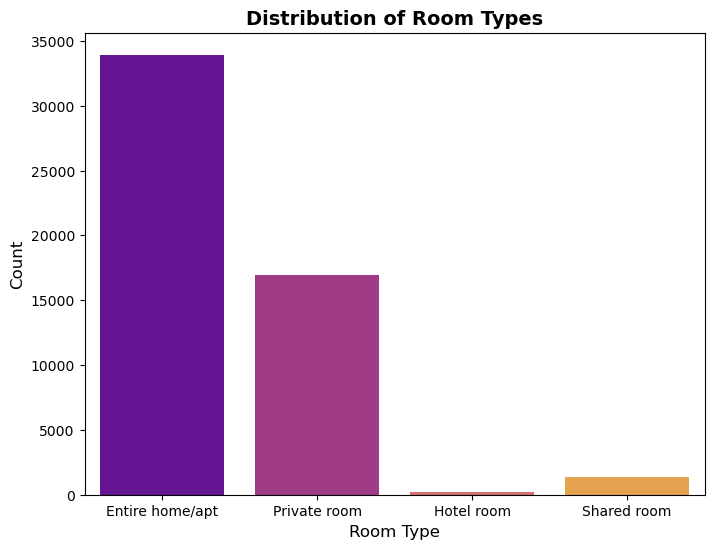

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for room_type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type', palette='plasma')
plt.xlabel('Room Type', size=12)
plt.ylabel('Count', size=12)
plt.title('Distribution of Room Types', size=14, weight='bold') 
plt.show()


Let's compare the effect of room type on the price


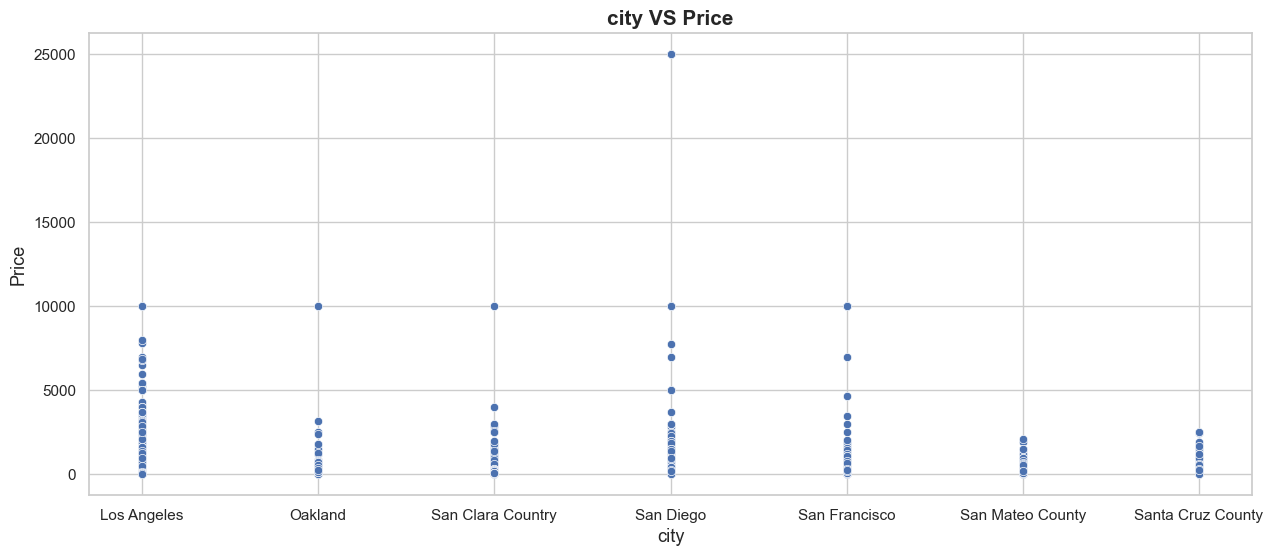

In [51]:
print("Let's compare the effect of city on the price")

# Scatter plot for room_type vs price
plt.figure(figsize=(15,6))
sns.scatterplot(x='city', y='price', data=df)
plt.xlabel("city", size=13)
plt.ylabel("Price", size=13)
plt.title("city VS Price", size=15, weight='bold') 
plt.show()

Let's compare the effect of room type on the price


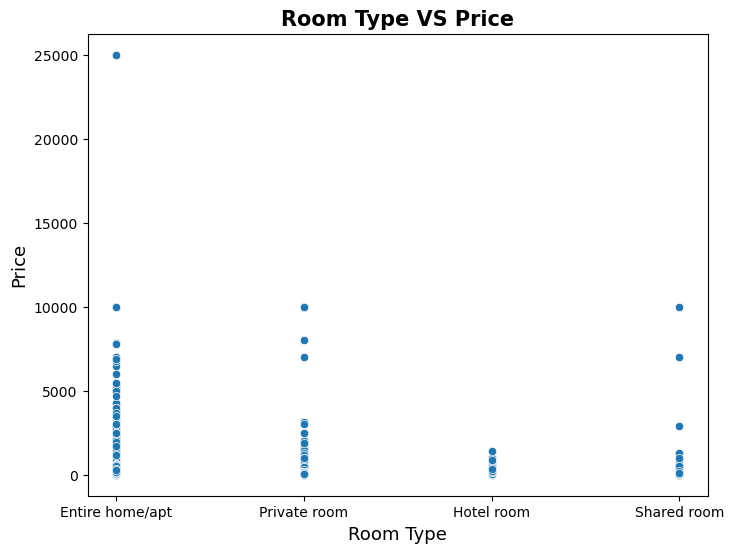

In [27]:
print("Let's compare the effect of room type on the price")

# Scatter plot for room_type vs price
plt.figure(figsize=(8,6))
sns.scatterplot(x='room_type', y='price', data=df)
plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type VS Price", size=15, weight='bold') 
plt.show()

In [30]:
df.head()

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
73072,521,33.98209,-118.38494,Entire home/apt,115,30,2,0.02,1,163,Los Angeles
73073,767,34.16562,-118.33458,Entire home/apt,176,2,8,0.15,1,0,Los Angeles
73074,3008,34.09768,-118.34602,Private room,74,30,26,0.34,2,338,Los Angeles
73075,3041,34.00475,-118.48127,Private room,155,1,21,0.19,2,360,Los Angeles
73077,9171,33.98750,-118.43200,Private room,55,30,310,2.28,4,282,Los Angeles


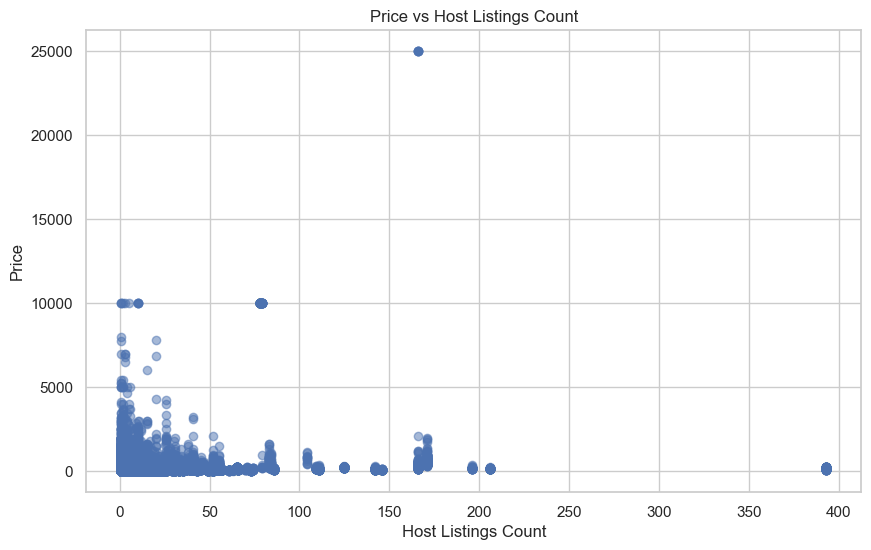

In [31]:
#price vs host_listing_count

# Set the style of the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['calculated_host_listings_count'],df['price'], alpha=0.5)

# Set the title and labels
plt.title('Price vs Host Listings Count')
plt.xlabel('Host Listings Count')
plt.ylabel('Price')

# Show the plot
plt.show()


In [32]:
#host having lest listing count has more prices as compared to host having less listing count

#less lissting has more price for some reason


Text(0.5, 1.0, 'price Distribution plot')

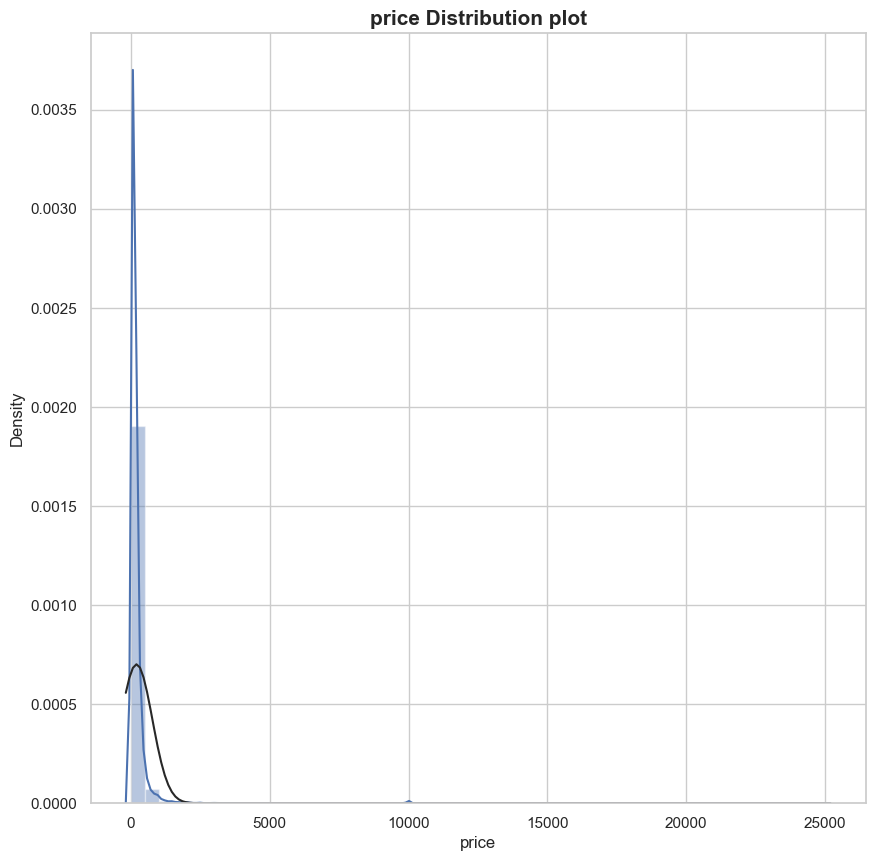

In [33]:
from scipy.stats import norm
plt.figure(figsize=(10,10))
sns.distplot(df['price'],fit=norm)
plt.title("price Distribution plot", size=15,weight='bold')

### skewed graph converting into log values



In [35]:
df['log_price']=np.log(df['price']+1)


In [39]:
df

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city,log_price
73072,521,33.98209,-118.38494,Entire home/apt,115,30,2,0.02,1,163,Los Angeles,4.753590
73073,767,34.16562,-118.33458,Entire home/apt,176,2,8,0.15,1,0,Los Angeles,5.176150
73074,3008,34.09768,-118.34602,Private room,74,30,26,0.34,2,338,Los Angeles,4.317488
73075,3041,34.00475,-118.48127,Private room,155,1,21,0.19,2,360,Los Angeles,5.049856
73077,9171,33.98750,-118.43200,Private room,55,30,310,2.28,4,282,Los Angeles,4.025352
...,...,...,...,...,...,...,...,...,...,...,...,...
205622,337811449,36.97975,-121.86266,Private room,130,2,2,1.62,4,9,Santa Cruz County,4.875197
205623,337811449,36.97988,-121.86389,Entire home/apt,1200,2,1,1.00,4,261,Santa Cruz County,7.090910
205624,2140089,36.95958,-121.97755,Entire home/apt,350,1,2,2.00,4,0,Santa Cruz County,5.860786
205626,348320632,36.97390,-121.97538,Private room,43,1,3,3.00,1,19,Santa Cruz County,3.784190


Text(0.5, 1.0, 'log price Distribution plot')

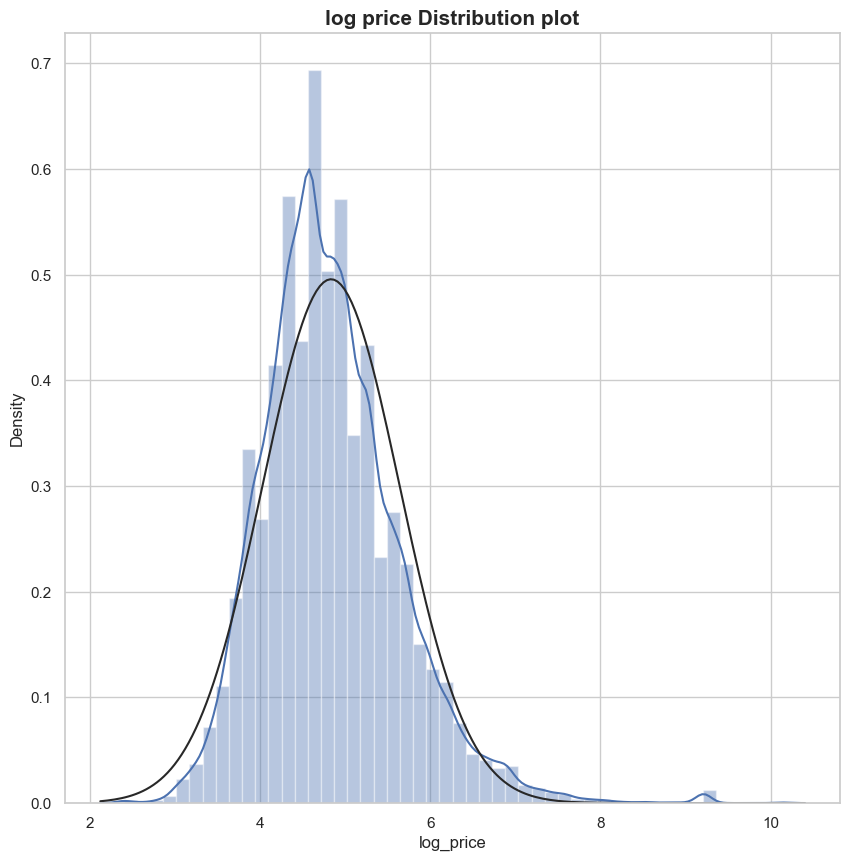

In [40]:
from scipy.stats import norm
plt.figure(figsize=( 10,10))
sns.distplot(df['log_price'],fit=norm)
plt.title("log price Distribution plot", size=15,weight='bold')

In [41]:
#roughly a normal distributed graph 
#black is normal distribution curve and blue is what we have

In [42]:
#drop the columns we dont need any more after visualization 
df.drop(['host_id','latitude','longitude','reviews_per_month','number_of_reviews'], axis=1,inplace=True)

In [43]:
df

,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,city,log_price
73072,Entire home/apt,115,30,1,163,Los Angeles,4.753590
73073,Entire home/apt,176,2,1,0,Los Angeles,5.176150
73074,Private room,74,30,2,338,Los Angeles,4.317488
73075,Private room,155,1,2,360,Los Angeles,5.049856
73077,Private room,55,30,4,282,Los Angeles,4.025352
...,...,...,...,...,...,...,...
205622,Private room,130,2,4,9,Santa Cruz County,4.875197
205623,Entire home/apt,1200,2,4,261,Santa Cruz County,7.090910
205624,Entire home/apt,350,1,4,0,Santa Cruz County,5.860786
205626,Private room,43,1,1,19,Santa Cruz County,3.784190


In [44]:
multicollinearity, V=np.linalg.eig(corr)
multicollinearity


#if the values are near around - its highly multicolinnear- because no va;ues are close so no relation


array([0.00458337, 0.233596  , 2.02642568, 1.76466375, 1.12465594,
       0.86473409, 0.96267118, 1.01885065, 0.99981934])

In [45]:
#encoding the data
df=df.join(pd.get_dummies(df.room_type)).drop(['room_type'],axis=1)

In [46]:
df

,price,minimum_nights,calculated_host_listings_count,availability_365,city,log_price,Entire home/apt,Hotel room,Private room,Shared room
73072,115,30,1,163,Los Angeles,4.753590,1,0,0,0
73073,176,2,1,0,Los Angeles,5.176150,1,0,0,0
73074,74,30,2,338,Los Angeles,4.317488,0,0,1,0
73075,155,1,2,360,Los Angeles,5.049856,0,0,1,0
73077,55,30,4,282,Los Angeles,4.025352,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
205622,130,2,4,9,Santa Cruz County,4.875197,0,0,1,0
205623,1200,2,4,261,Santa Cruz County,7.090910,1,0,0,0
205624,350,1,4,0,Santa Cruz County,5.860786,1,0,0,0
205626,43,1,1,19,Santa Cruz County,3.784190,0,0,1,0


In [52]:
df=df.join(pd.get_dummies(df.city)).drop(['city'],axis=1)

In [53]:
df

,price,minimum_nights,calculated_host_listings_count,availability_365,log_price,Entire home/apt,Hotel room,Private room,Shared room,Los Angeles,Oakland,San Clara Country,San Diego,San Francisco,San Mateo County,Santa Cruz County
73072,115,30,1,163,4.753590,1,0,0,0,1,0,0,0,0,0,0
73073,176,2,1,0,5.176150,1,0,0,0,1,0,0,0,0,0,0
73074,74,30,2,338,4.317488,0,0,1,0,1,0,0,0,0,0,0
73075,155,1,2,360,5.049856,0,0,1,0,1,0,0,0,0,0,0
73077,55,30,4,282,4.025352,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205622,130,2,4,9,4.875197,0,0,1,0,0,0,0,0,0,0,1
205623,1200,2,4,261,7.090910,1,0,0,0,0,0,0,0,0,0,1
205624,350,1,4,0,5.860786,1,0,0,0,0,0,0,0,0,0,1
205626,43,1,1,19,3.784190,0,0,1,0,0,0,0,0,0,0,1


### 5.Dividing the data into traing and testing  

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define dependent and independent sets
x = df.iloc[:, [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]  # Corrected syntax for selecting specific columns
y = df['log_price']

# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=353)

# Display a sample of training data
print("---------------------------Sample of x_train---------------------------")
print(x_train.head())
print("---------------------------Sample of y_train---------------------------")
print(y_train.head())


---------------------------Sample of x_train---------------------------
        minimum_nights  calculated_host_listings_count  availability_365  \
99720                1                               8               343   
196824              30                             111                28   
95524                2                               1                39   
89547               30                               2                63   
89967               30                              17               365   

        Entire home/apt  Hotel room  Private room  Shared room  Los Angeles  \
99720                 1           0             0            0            1   
196824                1           0             0            0            0   
95524                 1           0             0            0            1   
89547                 1           0             0            0            1   
89967                 1           0             0            0            1 

### 6. Model training

### Linear Regression

In [71]:
# Create and train a linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)

#Made prediction using Linear Regression

y_pred_linear=reg.predict(x_test)

#calculate and print the R- squared score for Linear Regression
linear_regression_r2=r2_score(y_test,y_pred_linear)
print("\nR-squared Score for linear Regression :",linear_regression_r2)

#Calculate RMSE for linear Regression
linear_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_linear))
print("RMSE for linear Regression :",linear_RMSE)

#Calculate MAE for linear Regression
linear_MAE=mean_absolute_error(y_test,y_pred_linear)
print("MAE for linear Regression :",linear_MAE)

#CREATE A DATAFRAME TO DISPLAT PREDICTED VS ACTUAL VALUE
comparison_df=pd.DataFrame({'Actual': y_test,'predicted':y_pred_linear})

#Print the dataframe
print(comparison_df.head())



R-squared Score for linear Regression : 0.353504573050194
RMSE for linear Regression : 0.6641682616158634
MAE for linear Regression : 0.48121424510905125
          Actual  predicted
189354  3.931826   4.305216
76306   5.398163   4.999091
189269  5.010635   5.286540
83846   4.615121   4.999091
92839   5.003946   5.148380
